<a href="https://colab.research.google.com/github/Alamgir-JUST/TACNet/blob/main/Coding/TACNet_with_Tabular_IoT_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
# Set font size and family for the entire figure
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'serif'

# **Importing Dataset**

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Loaded all Dataset after Perprocessing**

In [ ]:
import os
import pandas as pd

# Path to the folder containing CSV files
folder_path = '/content/drive/MyDrive/TabularIoTAttack'

# List to store DataFrames
dataframes = []

# Iterate through all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
        dataframes.append(df)  # Append the DataFrame to the list

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the shape of the combined DataFrame
print(f"Combined DataFrame shape: {combined_df.shape}")
df = combined_df.copy()

Combined DataFrame shape: (139642, 85)


In [ ]:
print(df.head())
print(df.info())


                                 Flow ID        Src IP  Src Port  \
0  192.168.1.45-192.168.1.212-52172-22-6  192.168.1.45     52172   
1  192.168.1.45-192.168.1.212-52202-22-6  192.168.1.45     52202   
2  192.168.1.45-192.168.1.212-52150-22-6  192.168.1.45     52150   
3  192.168.1.45-192.168.1.212-52218-22-6  192.168.1.45     52218   
4  192.168.1.45-192.168.1.212-52204-22-6  192.168.1.45     52204   

          Dst IP  Dst Port  Protocol               Timestamp  Flow Duration  \
0  192.168.1.212        22         6  02/11/2023 12:33:55 PM           3618   
1  192.168.1.212        22         6  02/11/2023 12:33:55 PM           3597   
2  192.168.1.212        22         6  02/11/2023 12:33:55 PM           3644   
3  192.168.1.212        22         6  02/11/2023 12:33:55 PM           3571   
4  192.168.1.212        22         6  02/11/2023 12:33:55 PM           3546   

   Total Fwd Packet  Total Bwd packets  ...  Active Mean  Active Std  \
0                 1                  1  ... 

In [ ]:
df = df.dropna()  # Drops rows with missing values


In [ ]:
df.value_counts('Attack Name')

,count
Attack Name,
Benign Traffic,86525
Dictionary Brute Force,18151
DoS SYN Flood,15243
MITM ARP Spoofing,14768
DoS UDP Flood,1848
DoS DNS Flood,1702
DoS ICMP Flood,1405


In [ ]:
# Updating the 'Attack Name' column with simplified categories
df['Attack Name'] = df['Attack Name'].replace({
    'Benign Traffic': 'Benign',
    'Dictionary Brute Force': 'Brute Force',
    'MITM ARP Spoofing': 'MITM'
})

# Rename all attack names starting with "DoS" to "DoS"
df['Attack Name'] = df['Attack Name'].apply(lambda x: 'DoS' if x.startswith('DoS') else x)

# Verify the changes
df['Attack Name'].value_counts()


,count
Attack Name,
Benign,86525
DoS,20198
Brute Force,18151
MITM,14768


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values

print("Columns with Missing Values:\n", missing_values)



# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values in numerical columns with median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values in categorical columns with mode
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify if missing values are filled
print("Missing values after filling:\n", df.isnull().sum().sum())  # Should be 0 if all missing values are handled

Columns with Missing Values:
 Series([], dtype: int64)
Missing values after filling:
 0


In [ ]:

import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Replace scientific notation, decimal, and integer strings with NaN
df = df.replace(
    to_replace=[r'^(-?\d+\.\d+e\+\d+|-?\d+\.\d+e-\d+|-?\d+\.\d+|-?\d+)$'],
    value=np.nan, regex=True
)

# Drop rows with any NaN values
df.dropna(inplace=True)

# Exclude 'Label' column when identifying numerical and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.difference(['Attack Name'])
cat_cols = df.select_dtypes(include=['object']).columns.difference(['Attack Name'])

# Normalize numerical columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Convert categorical columns to string type
df[cat_cols] = df[cat_cols].astype(str)

# Encode categorical columns
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

# Display processed DataFrame (Label remains unchanged)
df


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack Name,Label
0,41459,301,0.694586,6625,-0.698324,0.0,10829,-0.636051,-0.056382,-0.059872,...,-0.165645,-0.120247,-0.186095,-0.139565,-0.510983,-0.163524,-0.518144,-0.498509,Brute Force,1.276304
1,41462,301,0.695926,6625,-0.698324,0.0,10829,-0.636052,-0.056382,-0.059872,...,-0.165645,-0.120247,-0.186095,-0.139565,-0.510983,-0.163524,-0.518144,-0.498509,Brute Force,1.276304
2,41457,301,0.693603,6625,-0.698324,0.0,10829,-0.636050,-0.056382,-0.059872,...,-0.165645,-0.120247,-0.186095,-0.139565,-0.510983,-0.163524,-0.518144,-0.498509,Brute Force,1.276304
3,41465,301,0.696641,6625,-0.698324,0.0,10829,-0.636054,-0.054144,-0.059872,...,-0.165645,-0.120247,-0.186095,-0.139565,-0.510983,-0.163524,-0.518144,-0.498509,Brute Force,1.276304
4,41463,301,0.696016,6625,-0.698324,0.0,10829,-0.636055,-0.056382,-0.059872,...,-0.165645,-0.120247,-0.186095,-0.139565,-0.510983,-0.163524,-0.518144,-0.498509,Brute Force,1.276304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139637,42393,301,0.598007,10851,-0.678343,0.0,4620,-0.624046,-0.038476,-0.048844,...,-0.165645,-0.120247,-0.186095,-0.139565,-0.510983,-0.163524,-0.518144,-0.498509,MITM,1.276304
139638,50319,305,0.880866,10851,-0.678343,0.0,4622,-0.626834,-0.045191,-0.054358,...,-0.165645,-0.120247,-0.186095,-0.139565,-0.510983,-0.163524,-0.518144,-0.498509,MITM,1.276304
139639,42493,301,1.065270,10851,-0.678343,0.0,4622,-0.624161,-0.038476,-0.048844,...,-0.165645,-0.120247,-0.186095,-0.139565,-0.510983,-0.163524,-0.518144,-0.498509,MITM,1.276304
139640,51051,305,0.985665,12771,-0.678343,0.0,4623,-0.633134,-0.051906,-0.056196,...,-0.165645,-0.120247,-0.186095,-0.139565,-0.510983,-0.163524,-0.518144,-0.498509,MITM,1.276304


## **Save the Processed dataset**

In [ ]:
# Step 8: Save the processed DataFrame to CSV
output_path = f"{folder_path}/Tabbular_ioT_processed_data.csv"
df.to_csv(output_path, index=False)

print(f"✅ Processed data saved successfully at {output_path}")


✅ Processed data saved successfully at /content/drive/MyDrive/TabularIoTAttack/Tabbular_ioT_processed_data.csv


In [ ]:
df['Attack Name'].value_counts()

,count
Attack Name,
Benign,86525
DoS,20198
Brute Force,18151
MITM,14768


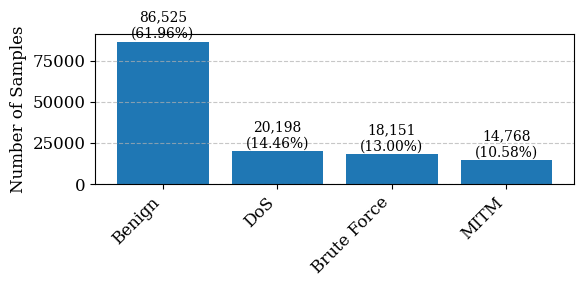

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is final_df

# Count samples and percentages
label_counts = df['Attack Name'].value_counts()
label_percentages = (label_counts / label_counts.sum()) * 100

# Set up the plot
plt.figure(figsize=(6, 3))
bars = plt.bar(label_counts.index, label_counts.values)

# Add count and percentage text above each bar
for idx, bar in enumerate(bars):
    height = bar.get_height()
    count_text = f'{label_counts.values[idx]:,}'
    percent_text = f'({label_percentages.values[idx]:.2f}%)'

    plt.text(
        bar.get_x() + bar.get_width()/2, height + 0.01*height,
        f'{count_text}\n{percent_text}',
        ha='center', va='bottom', fontsize=10
    )

# Titles and labels
#plt.title('Drone IDS Dataset: Data Samples per Attack Type (Count & %)', fontsize=18)
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


## **Proposed TACNet Model for IDS**

In [ ]:
# ✅ Imports
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Dropout, BatchNormalization, Conv1D,
    GlobalMaxPooling1D, Concatenate, Bidirectional, GRU,
    Multiply, Permute, Lambda, Reshape, LSTM
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# ✅ Channel Attention Block (with Lambda wrapper)
def channel_attention(input_tensor, reduction_ratio=8):
    channel = input_tensor.shape[-1]
    avg_pool = Lambda(lambda x: tf.reduce_mean(x, axis=1, keepdims=True))(input_tensor)
    dense_1 = Dense(channel // reduction_ratio, activation='relu')(avg_pool)
    dense_2 = Dense(channel, activation='sigmoid')(dense_1)
    return Multiply()([input_tensor, dense_2])

# ✅ Temporal Attention Block
def temporal_attention(input_seq):
    permuted = Permute((2, 1))(input_seq)
    attention = Dense(input_seq.shape[1], activation='softmax')(permuted)
    attention = Permute((2, 1))(attention)
    return Multiply()([input_seq, attention])

# ✅ Multi-scale Temporal Convolution + LSTM
def multi_scale_lstm_block(input_seq):
    cnn3 = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_seq)
    cnn5 = Conv1D(64, kernel_size=5, activation='relu', padding='same')(input_seq)
    cnn7 = Conv1D(64, kernel_size=7, activation='relu', padding='same')(input_seq)

    cnn_concat = Concatenate()([cnn3, cnn5, cnn7])
    cnn_concat = BatchNormalization()(cnn_concat)
    cnn_concat = Dropout(0.3)(cnn_concat)

    # Apply LSTM to capture temporal dependencies
    lstm_out = LSTM(128, return_sequences=True)(cnn_concat)

    return lstm_out

# ✅ TACNET Model Definition with Multi-Scale and LSTM Block
def TACNET(input_dim, num_classes):
    inputs = Input(shape=(input_dim,))
    x = Reshape((input_dim, 1))(inputs)

    # Multi-scale CNN + LSTM Block
    rnn_out = multi_scale_lstm_block(x)

    # Temporal Attention
    temporal_out = temporal_attention(rnn_out)

    # Channel Attention
    channel_out = channel_attention(temporal_out)

    # Global Pooling + Final Classifier
    pooled = GlobalMaxPooling1D()(channel_out)
    x = Dense(128, activation='relu')(pooled)
    x = Dropout(0.4)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# ✅ Load the Data (Assuming you already have the preprocessed dataframe 'df')
X = df.drop(columns=['Attack Name']).astype('float32')
y = df['Attack Name']

# ✅ Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_

# ✅ Handle class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weight_dict = dict(zip(np.unique(y_encoded), class_weights))

# ✅ Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# ✅ Build the Updated Model
model = TACNET(input_dim=X.shape[1], num_classes=len(class_names))

# ✅ Compile Model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ✅ Model Summary
model.summary()

# ✅ Callbacks (Only EarlyStopping)
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# ✅ Training the Model (Only on Training Data)
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=1024,
    callbacks=[early_stop],  # Only EarlyStopping callback
    class_weight=class_weight_dict,
    validation_data=(X_test, y_test),  # Add validation data
    verbose=1
)

# ✅ Evaluate the Model on Test Data
y_test_pred = np.argmax(model.predict(X_test), axis=-1)

# ✅ Calculate Test Metrics
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# ✅ Print Test Metrics
print("Test Metrics:")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 84)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 84, 1)     │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 84, 64)    │        256 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 84, 64)    │        384 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 84, 64)    │        512 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 84, 192)   │          0 │ conv1d[0][0],     │
│ (Concatenate)       │                   │            │ conv1d_1[0][0],   │
│                     │                   │            │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 84, 192)   │        768 │ concatenate[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 84, 192)   │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 84, 128)   │    164,352 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute (Permute)   │ (None, 128, 84)   │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128, 84)   │      7,140 │ permute[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute_1 (Permute) │ (None, 84, 128)   │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 84, 128)   │          0 │ lstm[0][0],       │
│                     │                   │            │ permute_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 1, 128)    │          0 │ multiply[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1, 16)     │      2,064 │ lambda[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1, 128)    │      2,176 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_1          │ (None, 84, 128)   │          0 │ multiply[0][0],   │
│ (Multiply)          │                   │            │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ multiply_1[0][0]  │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │     16,512 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 4)         │        516 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 194,680 (760.47 KB)

 Trainable params: 194,296 (758.97 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 436s 4s/step - accuracy: 0.7134 - loss: 0.9226 - val_accuracy: 0.8201 - val_loss: 0.9194
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 405s 4s/step - accuracy: 0.9805 - loss: 0.0565 - val_accuracy: 0.9399 - val_loss: 0.1829
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 452s 4s/step - accuracy: 0.9826 - loss: 0.0486 - val_accuracy: 0.9835 - val_loss: 0.0364
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 398s 4s/step - accuracy: 0.9850 - loss: 0.0417 - val_accuracy: 0.9963 - val_loss: 0.0108
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 442s 4s/step - accuracy: 0.9856 - loss: 0.0432 - val_accuracy: 0.9957 - val_loss: 0.0119
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 442s 4s/step - accuracy: 0.9872 - loss: 0.0372 - val_accuracy: 0.9931 - val_loss: 0.0164
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 396s 4s/step - accuracy: 0.9863 - loss: 0.0365 - val_accuracy: 0.9965 - val_loss: 0.0102
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 382s 3s/step - accuracy: 0.9868 - loss: 0.0379 - val_accu

In [ ]:
from sklearn.metrics import classification_report

# ✅ Print Classification Report
report = classification_report(y_test, y_test_pred, target_names=class_names, digits=5)
print(report)


              precision    recall  f1-score   support

      Benign    1.00000   1.00000   1.00000     17305
 Brute Force    1.00000   0.98292   0.99139      3630
         DoS    0.99778   0.99975   0.99876      4040
        MITM    0.97906   0.99695   0.98792      2954

    accuracy                        0.99742     27929
   macro avg    0.99421   0.99491   0.99452     27929
weighted avg    0.99746   0.99742   0.99742     27929



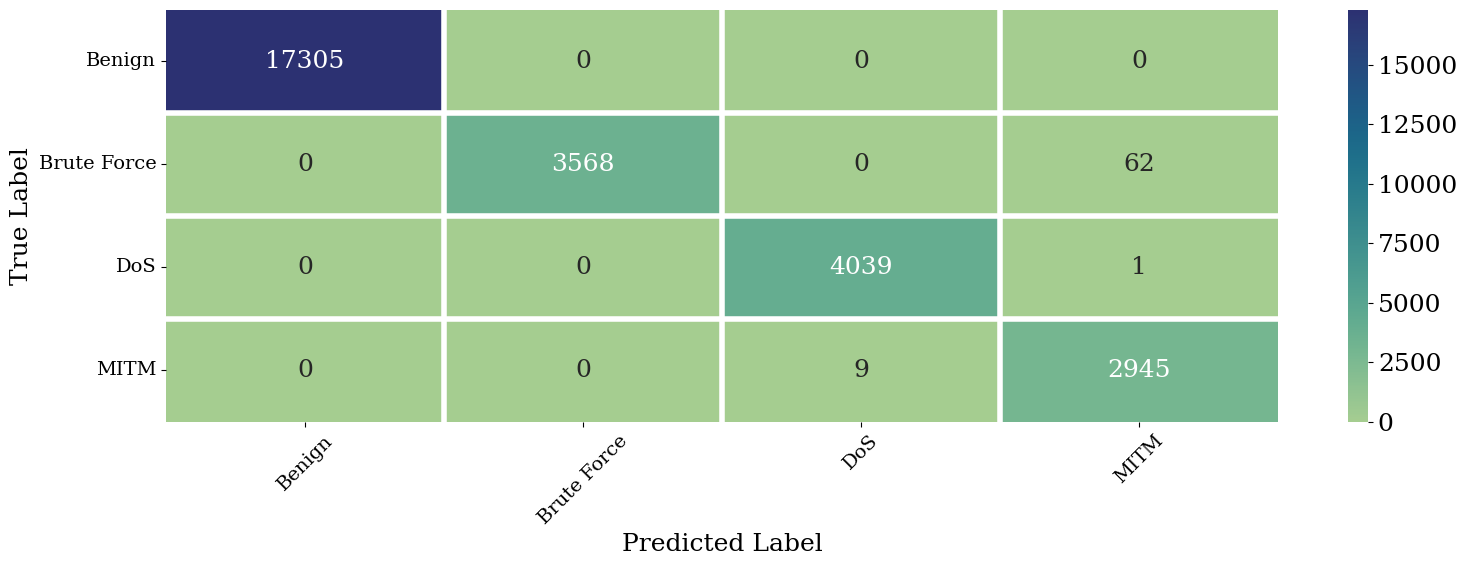

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Set font properties globally (compatible with Google Colab)
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Step 1: Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Step 2: Get class labels from label encoder
#label_names = label_encoder.classes_

# Step 3: Create a plot for the confusion matrix
fig, ax = plt.subplots(figsize=(16, 6))

# Step 4: Define the color map
cmap = sns.color_palette("crest", as_cmap=True)

# Step 5: Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True, ax=ax,
            xticklabels=class_names, yticklabels=class_names, annot_kws={"fontsize": 18})

# Step 6: Customize the plot
#ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

# Rotate tick labels
ax.set_xticklabels(class_names, rotation=45, fontsize=14)
ax.set_yticklabels(class_names, rotation=0, fontsize=14)

# Optional: Add white gridlines between heatmap cells
for edge, spine in ax.spines.items():
    spine.set_visible(False)

ax.hlines([i for i in range(1, len(class_names))], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([i for i in range(1, len(class_names))], *ax.get_ylim(), colors='white', linewidth=4)

# Final layout and display
plt.tight_layout()
plt.show()


873/873 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step


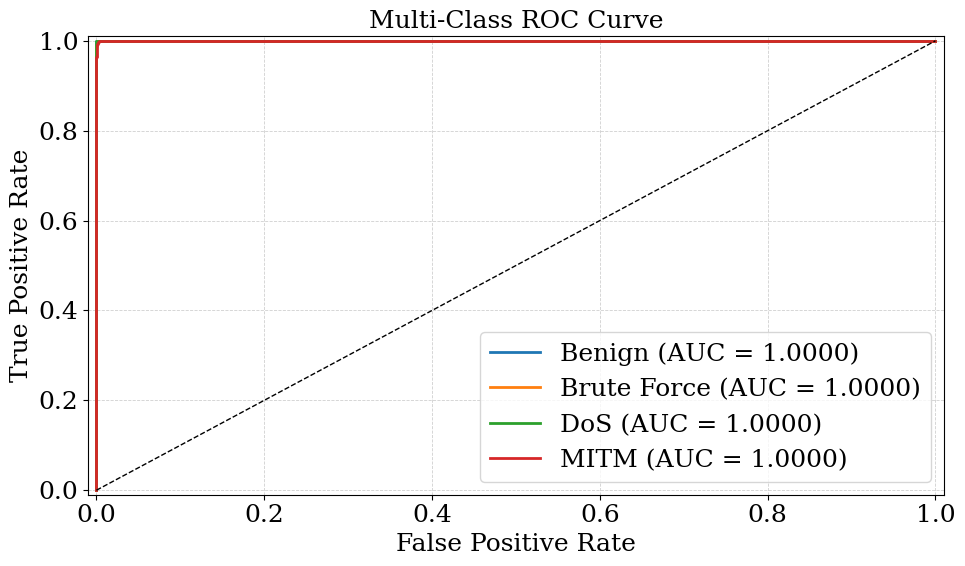

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# --- Setup and predictions ---
# Ensure y_test is in integer format, not one-hot
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# Predict probabilities
y_pred_proba = model.predict(X_test)

# Binarize true labels for ROC computation
y_true_bin = label_binarize(y_true, classes=range(len(class_names)))

# --- Initialize ---
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(10, 6))
colors = plt.get_cmap("tab10")

# --- ROC per class ---
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f"{class_names[i]} (AUC = {roc_auc[i]:.4f})",
             color=colors(i))

# --- Plot settings ---
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
plt.tight_layout()
plt.show()


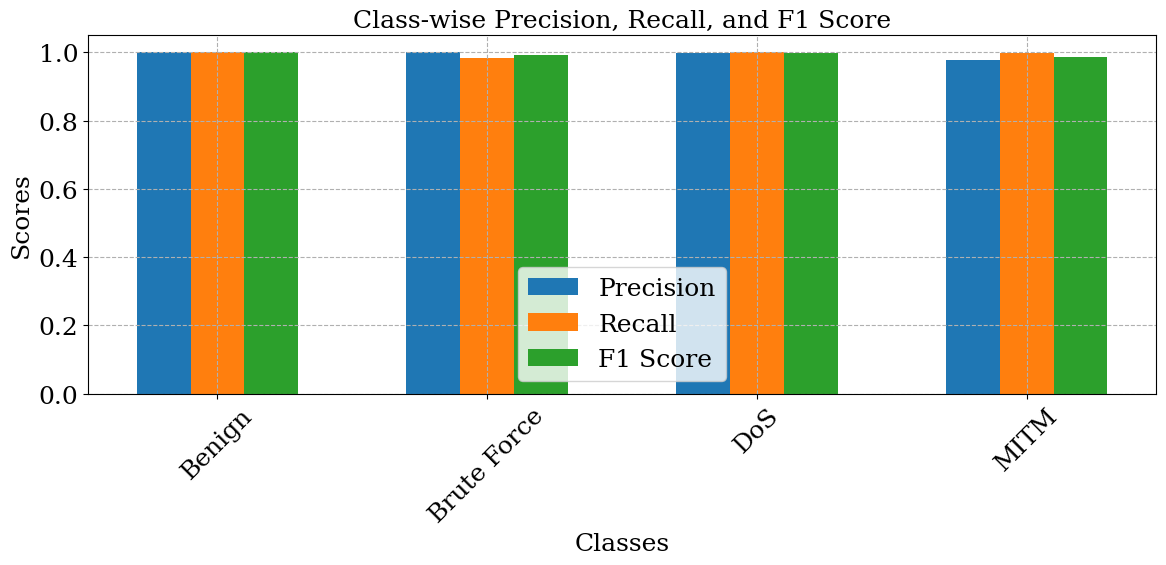

In [ ]:
# Calculate metrics
precision_class = precision_score(y_test, y_test_pred, average=None)
recall_class = recall_score(y_test, y_test_pred, average=None)
f1_class = f1_score(y_test, y_test_pred, average=None)

# Plot precision, recall, and F1 for each class
labels = class_names
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2

# Bar chart for precision, recall, and F1 score
ax.bar(x - width, precision_class, width, label='Precision')
ax.bar(x, recall_class, width, label='Recall')
ax.bar(x + width, f1_class, width, label='F1 Score')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Class-wise Precision, Recall, and F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
plt.grid(linestyle='--')  # Dashed grid
ax.legend()

plt.tight_layout()
plt.show()


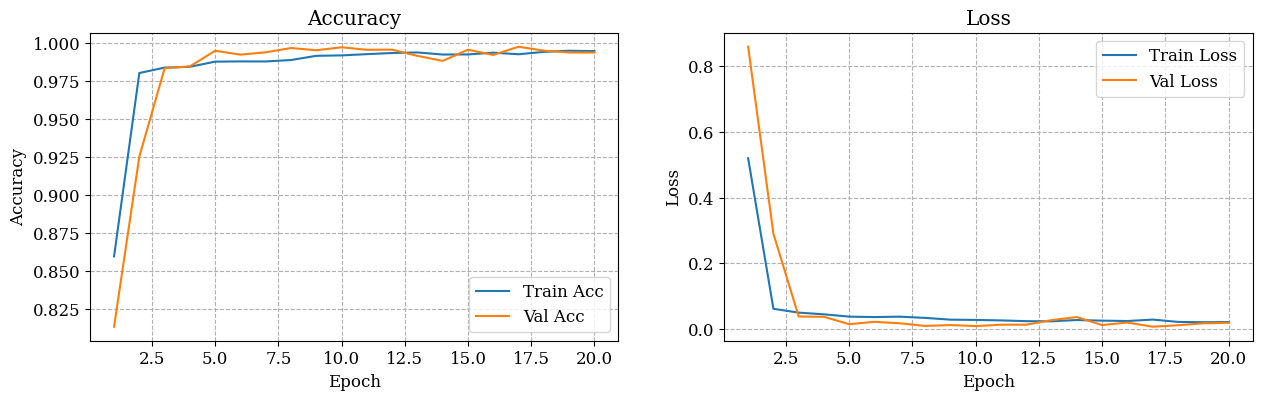

In [ ]:
import matplotlib.pyplot as plt

# === 6. PLOT METRICS ===
def plot_training_metrics(history):
    history_dict = history.history
    epochs = range(1, len(history_dict['loss']) + 1)

    plt.figure(figsize=(15, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history_dict['accuracy'], label='Train Acc')
    plt.plot(epochs, history_dict['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(linestyle='--')  # Dashed grid

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_dict['loss'], label='Train Loss')
    plt.plot(epochs, history_dict['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(linestyle='--')  # Dashed grid

# Plot training curves
plot_training_metrics(history)


In [ ]:
import tracemalloc
import time

# Start memory tracking
tracemalloc.start()

# Measure Inference Time
start_time = time.time()
y_test_pred = np.argmax(model.predict(X_test), axis=-1)
inference_time = time.time() - start_time

# Measure Memory Footprint
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

# Display Inference Time and Memory Footprint
print(f"Inference Time: {inference_time:.4f} seconds")
print(f"Memory Footprint: {current / 10**6:.4f} MB; Peak Memory: {peak / 10**6:.4f} MB")


873/873 ━━━━━━━━━━━━━━━━━━━━ 59s 67ms/step
Inference Time: 59.3844 seconds
Memory Footprint: 0.4104 MB; Peak Memory: 10.1482 MB


# **Thank You**